## Final Project Submission

* Student names: Amos Kipkirui, Brian Muli, Emilly Njue, Swaleh Athuman, Samwel Kagwi, Heddy Berit
* Students pace: Full time
* Scheduled project review date/time: 21/04/2023
* Instructor name: Lucille Kaleha, Simon Karu, Nikita Njoroge
* Blog post URL: https://github.com/swalehmwadime/dsc-phase-2-project-v2-3.git
* Document write up URL:https://moringaclassroom.slack.com/archives/C053RE5LN77/p1681936316349359


# BUSINESS UNDERSTANDING

### INTRODUCTION

The real estate market is a dynamic and ever-changing industry, and accurate prediction of housing prices is crucial for both buyers and sellers. In order to make informed decisions, stakeholders in the real estate industry need access to reliable and comprehensive data.

The King County House Sales dataset is a valuable resource for understanding the dynamics of the real estate market in King County. This dataset contains detailed information on house sale prices including a wide range of features such as the number of bedrooms, bathrooms, square footage, location, and more. 

This dataset allows for in-depth analysis and modeling to understand the factors that influence housing prices in the region, and serves as a valuable resource for developing and testing predictive models for accurate price predictions.


We will provide an overview of the King County House Sales dataset, including its key features, data quality, and potential use cases. We will also highlight the significance of this dataset for evaluating regression models to predict housing prices in King County, and the potential benefits it can offer to stakeholders in the real estate industry. 

### Business Problem
A real estate agency located in King County is looking to advice homeowners about how home renovations might increase the value of their homes, and by what amount. The agency is looking to use the King County house dataset provided to make recommendations on the best renovations that home owners can undertake.

### PROBLEM STATEMENT
To aid in making these recommendations, we will attempt to answer these questions:

1. Determine what are the key factors that significantly impact housing prices in King County?

2. How does the number of bedrooms, bathrooms, grade and square footage of a house correlate with its sale price in King County?

3. Predict House sale prices given houses specifications

# Data Understanding
This project uses the King County House Sales dataset.

In [250]:
#Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# Set the Seaborn style
sns.set_style("darkgrid")

import statsmodels.api as sm
import numpy as np
import scipy.stats as stats

In [251]:
data=pd.read_csv('data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [252]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Data preparation

In [254]:

def analyze(data):
    
    # Check the shape (rows and columns) of the DataFrame
    print("Shape of the DataFrame:")
    print(data.shape)

    # Display the first few rows of the DataFrame
    print("\nFirst few rows of the DataFrame:")
    print(pd.DataFrame(data.head()))

    # Check the data types of each column in the DataFrame
    print("\nData types of columns in the DataFrame:")
    print(data.dtypes)

    # Check for missing values in the DataFrame
    print("\nMissing values in the DataFrame:")
    print(data.isnull().sum())

    # Drop columns with missing values
    data.dropna(axis=1, inplace=True)

    # Check for duplicate rows in the DataFrame
    print("\nDuplicate rows in the DataFrame:")
    print(data.duplicated().sum())

    # Check for unique values in each column of the DataFrame
    print("\nUnique values in each column of the DataFrame:")
    for col in data.columns:
        unique_values = data[col].nunique()
        print(f"{col}: {unique_values}")

    # Check value counts of categorical columns in the DataFrame
    print("\nValue counts of categorical columns:")
    for col in data.columns:
        if data[col].dtype == 'object':
            print(f"{col}:")
            print(data[col].value_counts())
            print()
            
            
analyze(data)


Shape of the DataFrame:
(21597, 21)

First few rows of the DataFrame:
           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     lo

Checking the unique values in the grade column

In [255]:
data.grade.unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

Splitting the grade column into numerical and description columns

In [256]:
# Define a function to extract the numeric grade from the grade column
def extract_numeric_grade(s):
    numeric_str = ''
    for char in s:
        if char.isdigit():
            numeric_str += char
    return int(numeric_str)

# Define a function to extract the grade description from the grade column
def extract_grade_desc(s):
    grade_desc = ''
    for char in s:
        if not char.isdigit() and char != ' ':
            grade_desc += char
    return grade_desc.strip()

# Extract the numeric grade and grade description using the custom functions
data['numeric_grade'] = data['grade'].apply(lambda x: extract_numeric_grade(x))
data['grade_desc'] = data['grade'].apply(lambda x: extract_grade_desc(x))

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,numeric_grade,grade_desc
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,7,Average
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,7,Average
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,6,LowAverage
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,7,Average
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,8,Good


In [257]:
data.drop(columns=['condition', 'grade', 'id', 'date'], inplace=True)

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,numeric_grade,grade_desc
0,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,7,Average
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,7,Average
2,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,98028,47.7379,-122.233,2720,8062,6,LowAverage
3,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,7,Average
4,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,8,Good


In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   sqft_above     21597 non-null  int64  
 7   sqft_basement  21597 non-null  object 
 8   yr_built       21597 non-null  int64  
 9   zipcode        21597 non-null  int64  
 10  lat            21597 non-null  float64
 11  long           21597 non-null  float64
 12  sqft_living15  21597 non-null  int64  
 13  sqft_lot15     21597 non-null  int64  
 14  numeric_grade  21597 non-null  int64  
 15  grade_desc     21597 non-null  object 
dtypes: float64(5), int64(9), object(2)
memory usage: 2.6+ MB


Creating a correlation matrix of the columns

In [259]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,numeric_grade
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,-0.053402,0.306692,0.022036,0.585241,0.082845,0.667951
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.356563
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,-0.204786,0.024280,0.224903,0.569884,0.088303,0.665838
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,-0.199802,0.052155,0.241214,0.756402,0.184342,0.762779
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.114731
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.458794
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.756073
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.347210,-0.148370,0.409993,0.326377,0.070777,0.447865
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,1.000000,0.266742,-0.564259,-0.279299,-0.147294,-0.185771
lat,0.306692,-0.009951,0.024280,0.052155,-0.085514,0.049239,-0.001199,-0.148370,0.266742,1.000000,-0.135371,0.048679,-0.086139,0.113575


Checking the correlation of the columns to the price

In [260]:
pd.DataFrame(data.corr()['price']).sort_values(by='price',ascending=False)

,price
price,1.000000
sqft_living,0.701917
numeric_grade,0.667951
sqft_above,0.605368
sqft_living15,0.585241
bathrooms,0.525906
bedrooms,0.308787
lat,0.306692
floors,0.256804
sqft_lot,0.089876


Pick the relevant columns to be used

In [292]:
relevant_columns=['sqft_living','bathrooms','numeric_grade','bedrooms','price', 'zipcode']
data=data[relevant_columns]
data

,sqft_living,bathrooms,numeric_grade,bedrooms,price,zipcode
0,1180,1.00,7,3,221900.0,98178
1,2570,2.25,7,3,538000.0,98125
2,770,1.00,6,2,180000.0,98028
3,1960,3.00,7,4,604000.0,98136
4,1680,2.00,8,3,510000.0,98074
...,...,...,...,...,...,...
21592,1530,2.50,8,3,360000.0,98103
21593,2310,2.50,8,4,400000.0,98146
21594,1020,0.75,7,2,402101.0,98144
21595,1600,2.50,8,3,400000.0,98027


Statistical description

In [262]:
data.describe()

,sqft_living,bathrooms,numeric_grade,bedrooms,price,zipcode
count,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000
mean,2080.321850,2.115826,7.657915,3.373200,5.402966e+05,98077.951845
std,918.106125,0.768984,1.173200,0.926299,3.673681e+05,53.513072
min,370.000000,0.500000,3.000000,1.000000,7.800000e+04,98001.000000
25%,1430.000000,1.750000,7.000000,3.000000,3.220000e+05,98033.000000
50%,1910.000000,2.250000,7.000000,3.000000,4.500000e+05,98065.000000
75%,2550.000000,2.500000,8.000000,4.000000,6.450000e+05,98118.000000
max,13540.000000,8.000000,13.000000,33.000000,7.700000e+06,98199.000000


From description we can see that:

- Average price of house sold in King County is $5,402,966.

- The maximum price of house sold in King County is $7,700,000.

- The average no. of bedrooms in houses sold in KC is 3/House with 2 bathrooms/bedroom with one house having 33 bedrooms.

- The average area of house is 2080 Sqft with one house having 13540 Sqft. living area.

## Visualizing the distribution of columns

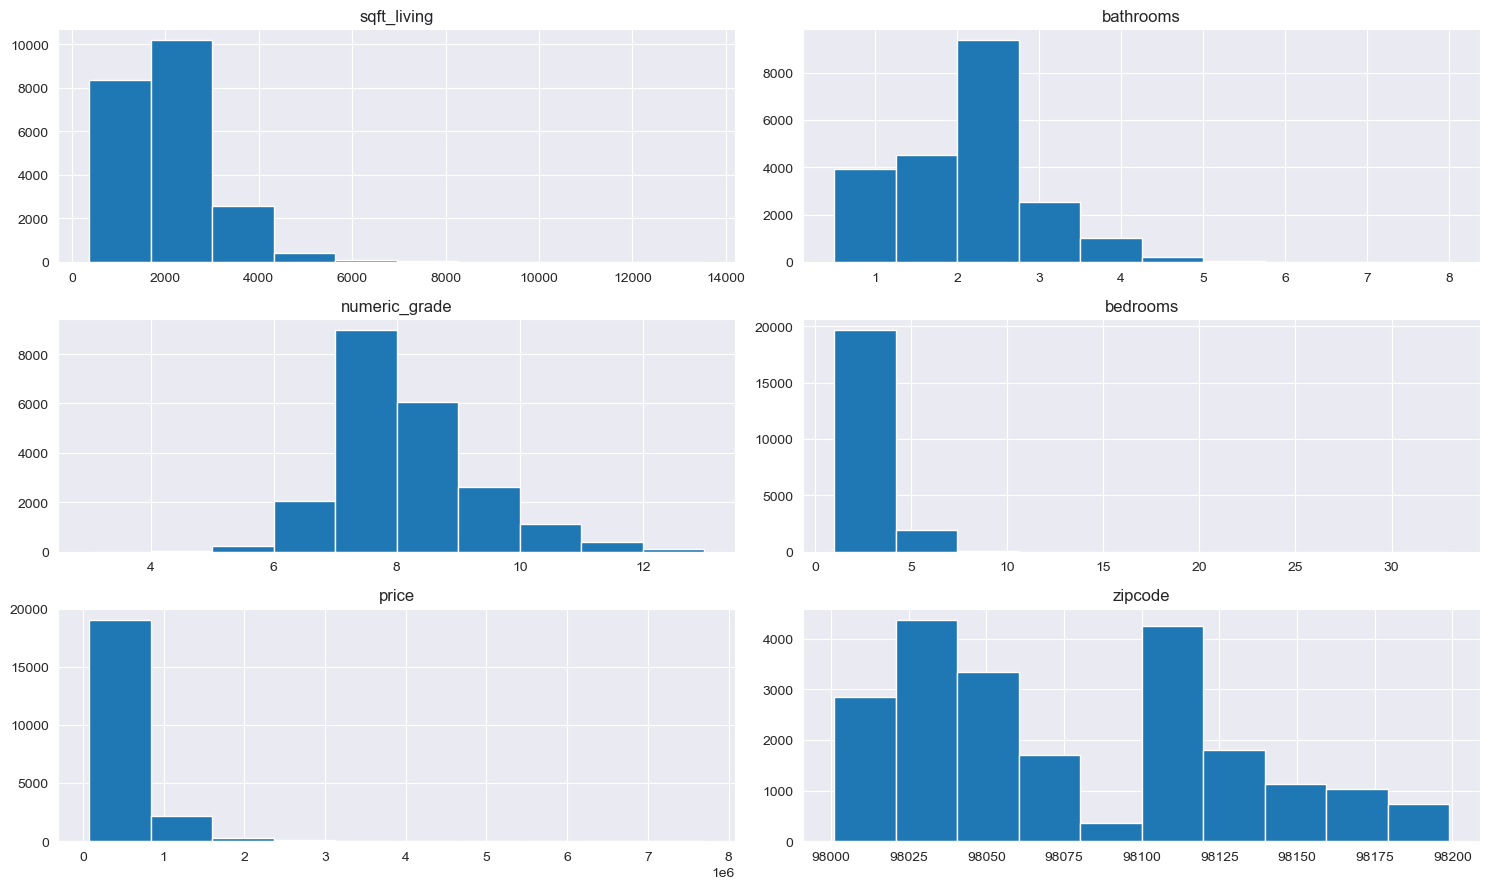

In [263]:
# Plot histograms of all columns in the DataFrame
data.hist(figsize=(15, 9))
plt.tight_layout()
plt.show()

In [265]:
pd.DataFrame(data.corr()['price']).sort_values(by='price',ascending=False)

,price
price,1.000000
sqft_living,0.701917
numeric_grade,0.667951
bathrooms,0.525906
bedrooms,0.308787
zipcode,-0.053402


In [267]:
#function to remove outliers
def remove_outliers(data, cols):
    for col in cols:
        z = np.abs(stats.zscore(data[col]))
        threshold = 3
        data = data[z < threshold]
    return data


In [268]:
cols_to_remove_outliers = ['sqft_living','bathrooms','bedrooms','numeric_grade','price', 'zipcode']
data = remove_outliers(data , cols_to_remove_outliers)

In [269]:
data

,sqft_living,bathrooms,bedrooms,numeric_grade,price,zipcode
0,1180,1.00,3,7,221900.0,98178
1,2570,2.25,3,7,538000.0,98125
2,770,1.00,2,6,180000.0,98028
3,1960,3.00,4,7,604000.0,98136
4,1680,2.00,3,8,510000.0,98074
...,...,...,...,...,...,...
21592,1530,2.50,3,8,360000.0,98103
21593,2310,2.50,4,8,400000.0,98146
21594,1020,0.75,2,7,402101.0,98144
21595,1600,2.50,3,8,400000.0,98027


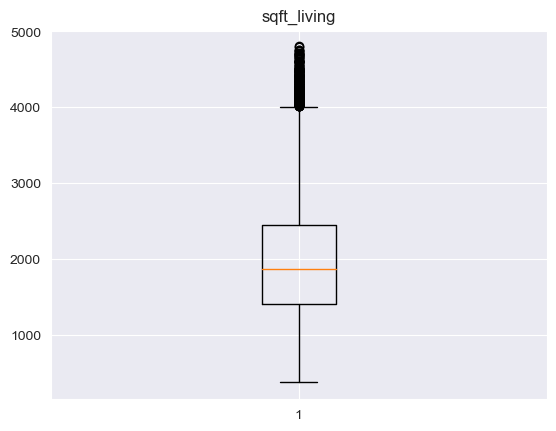

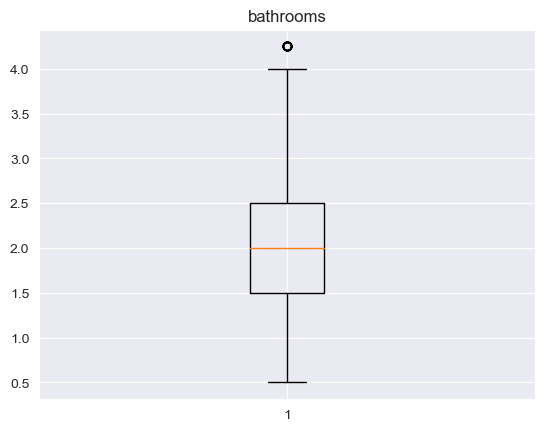

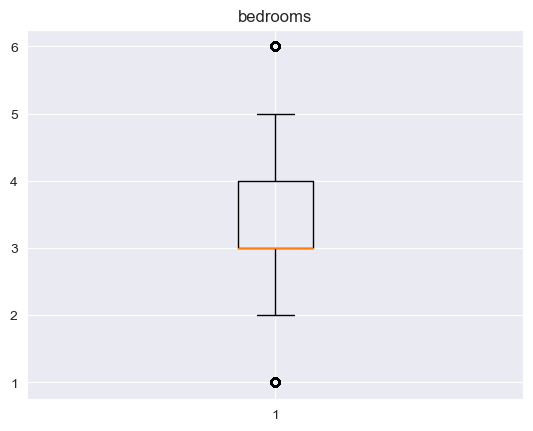

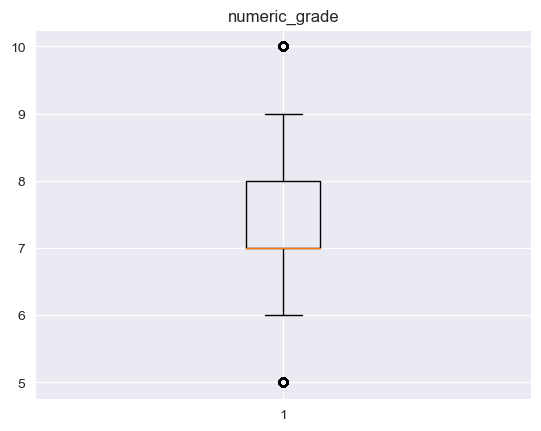

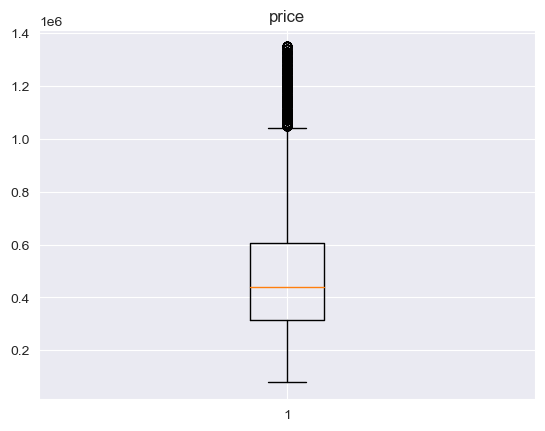

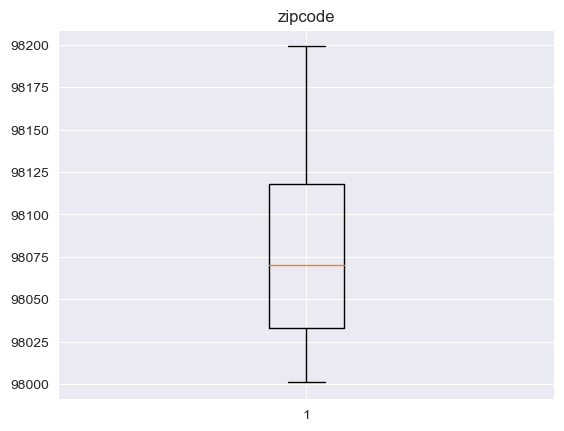

In [270]:
for col in data:
    plt.figure()
    plt.boxplot(data[col])
    plt.title(col)
    plt.show()

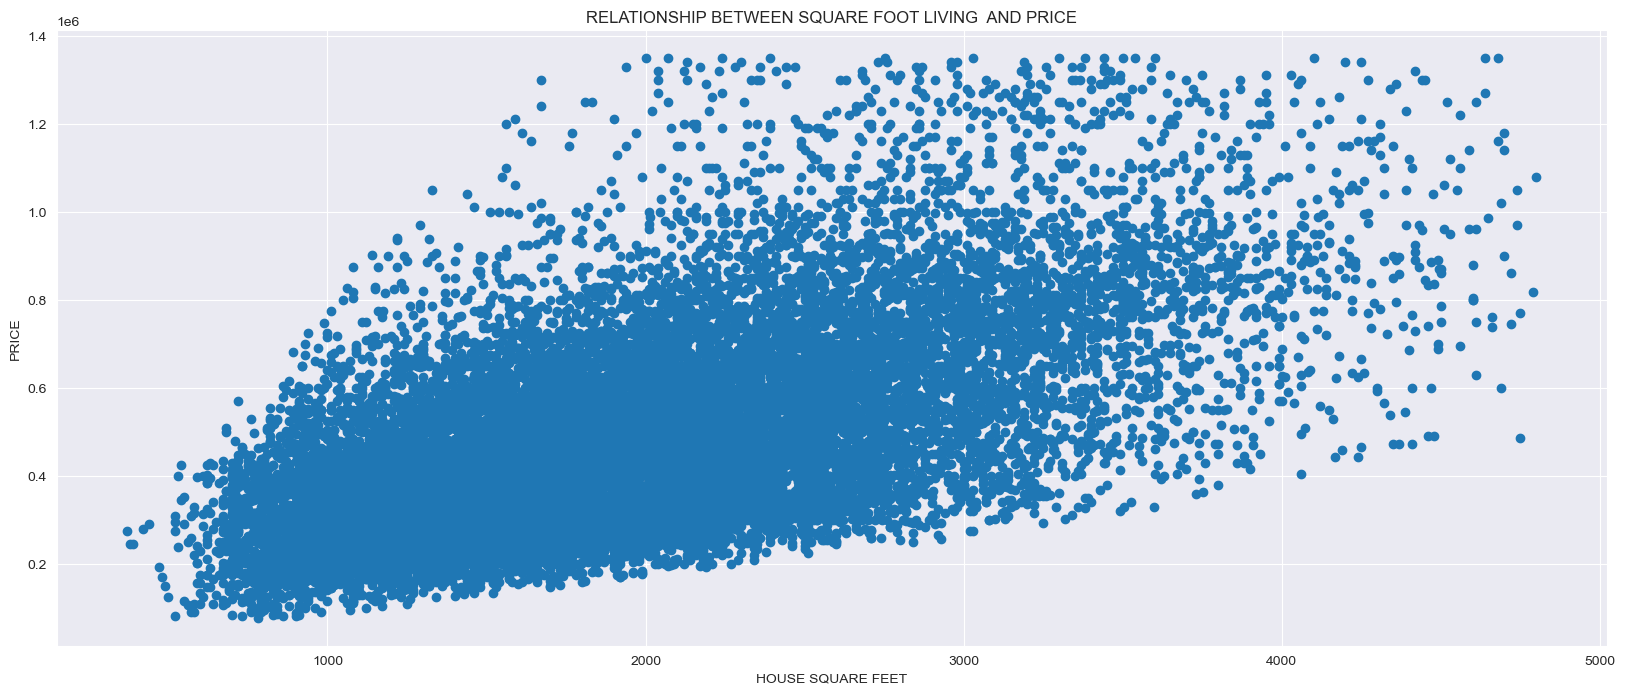

In [297]:

fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(data['sqft_living'], data['price'])
ax.set_xlabel('HOUSE SQUARE FEET')
ax.set_ylabel('PRICE')
ax.set_title('RELATIONSHIP BETWEEN SQUARE FOOT LIVING  AND PRICE');


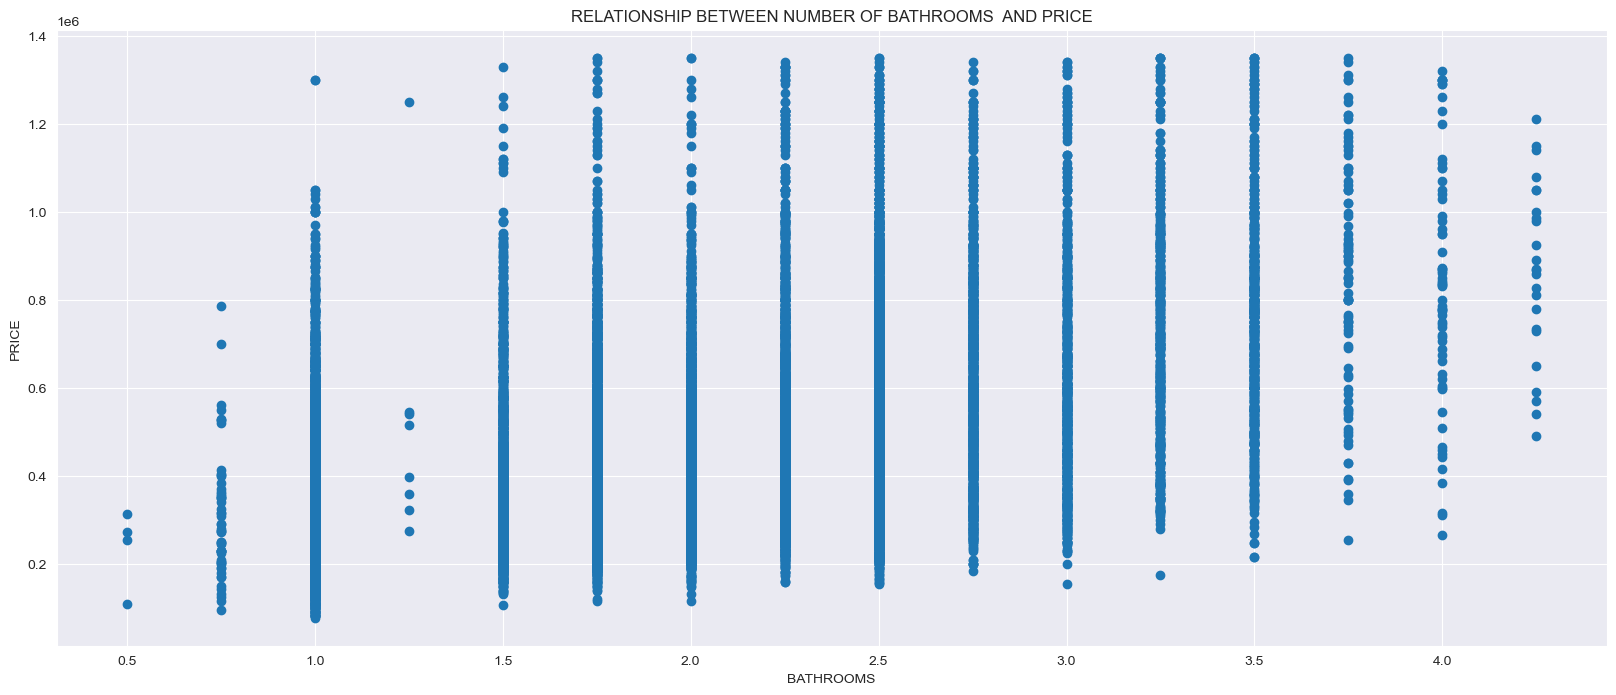

In [298]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(data['bathrooms'], data['price'])
ax.set_xlabel('BATHROOMS')
ax.set_ylabel('PRICE')
ax.set_title('RELATIONSHIP BETWEEN NUMBER OF BATHROOMS  AND PRICE');


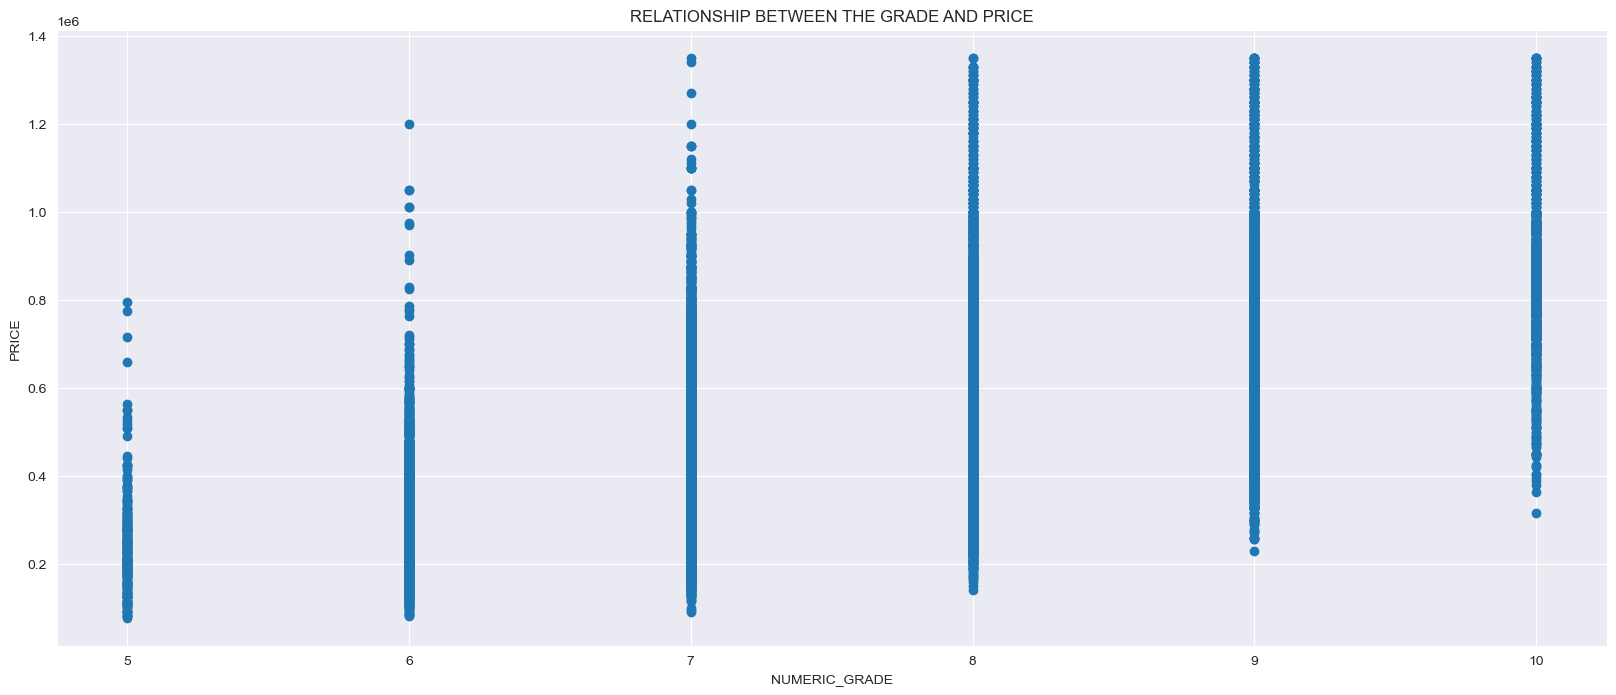

In [299]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(data['numeric_grade'], data['price'])
ax.set_xlabel('NUMERIC_GRADE')
ax.set_ylabel('PRICE')
ax.set_title('RELATIONSHIP BETWEEN THE GRADE AND PRICE');


<AxesSubplot:>

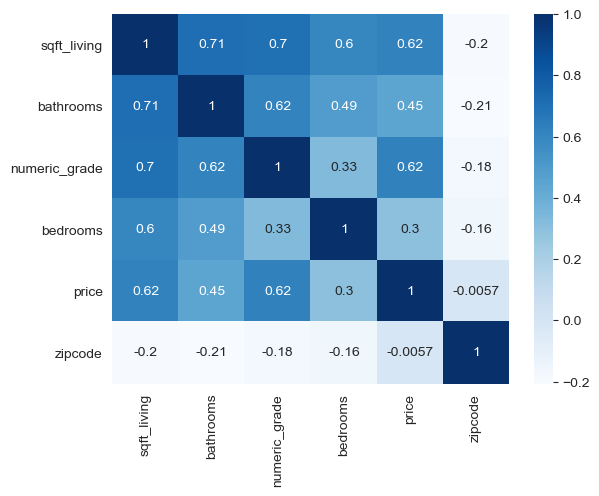

In [300]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')

## MODELLING

In [275]:
y = data['price']

X = data[['sqft_living']]

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


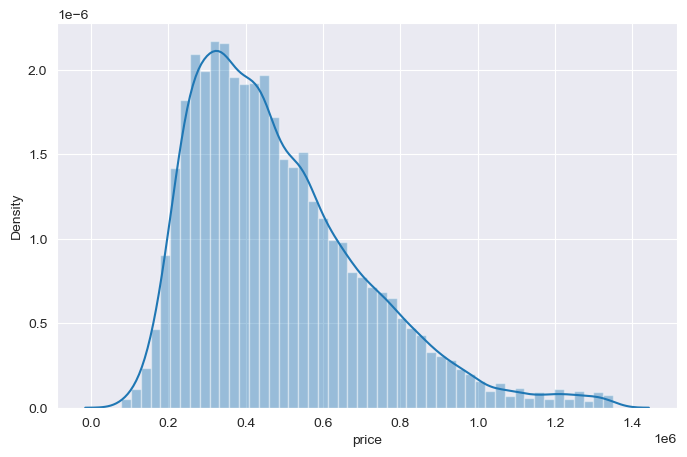

In [276]:
#visualization of the distribution of the target variable
fig,ax=plt.subplots(figsize=(8,5))
sns.distplot(data['price']);

### model with 1 predictor

In [277]:
model = sm.OLS(y, sm.add_constant(X))
fit = model.fit()

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                 1.270e+04
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:00:22   Log-Likelihood:            -2.7675e+05
No. Observations:               20497   AIC:                         5.535e+05
Df Residuals:                   20495   BIC:                         5.535e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.21e+05   3462.996     34.950      

### Interpretation of the model

* The model is statistically significant overall, with an F-statistic p-value well below 0.05

* The model explains about 38% of the variance in price

* The model coefficients (`const` and `sqft_living`) are both statistically significant, with t-statistic p-values well below 0.05

* for 0 "sqft_living" , the estimated "price" is estimated to be $121000.

* For each increase of 1 unit in "sqft_living", we see an associated increase in price of about $184

### add more predictor variables

In [278]:
X_update = data[['sqft_living', 'numeric_grade', 'bathrooms', 'bedrooms', 'zipcode']]

X_update

,sqft_living,numeric_grade,bathrooms,bedrooms,zipcode
0,1180,7,1.00,3,98178
1,2570,7,2.25,3,98125
2,770,6,1.00,2,98028
3,1960,7,3.00,4,98136
4,1680,8,2.00,3,98074
...,...,...,...,...,...
21592,1530,8,2.50,3,98103
21593,2310,8,2.50,4,98146
21594,1020,7,0.75,2,98144
21595,1600,8,2.50,3,98027


### From square feet to square meters

In [279]:
X_metric = X_update.copy()

#change square feet to square meters 1sqft = 0.092903
X_metric['sqft_living'] = X_metric['sqft_living'] * 0.092903

X_metric

,sqft_living,numeric_grade,bathrooms,bedrooms,zipcode
0,109.62554,7,1.00,3,98178
1,238.76071,7,2.25,3,98125
2,71.53531,6,1.00,2,98028
3,182.08988,7,3.00,4,98136
4,156.07704,8,2.00,3,98074
...,...,...,...,...,...
21592,142.14159,8,2.50,3,98103
21593,214.60593,8,2.50,4,98146
21594,94.76106,7,0.75,2,98144
21595,148.64480,8,2.50,3,98027


In [280]:
metric_model = sm.OLS(y, sm.add_constant(X_metric['sqft_living'])).fit()
print(metric_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                 1.270e+04
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:00:23   Log-Likelihood:            -2.7675e+05
No. Observations:               20497   AIC:                         5.535e+05
Df Residuals:                   20495   BIC:                         5.535e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.21e+05   3462.996     34.950      

### Interpretation

* The model is statistically significant overall, with an F-statistic p-value well below 0.05

* The model explains about 38% of the variance in price

* The model coefficients (`const` and `sqft_living`) are both statistically significant, with t-statistic p-values well below 0.05

* for 0 "sqft_living" , the estimated "price" is estimated to be $121000.

* For each increase of 1 unit in "sqft_living", we see an associated increase in price of about $1990.

### Model with 4 predictors

In [281]:
second_model = sm.OLS(y, sm.add_constant(X_update))
model_fit = second_model.fit()

print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     3710.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:00:23   Log-Likelihood:            -2.7508e+05
No. Observations:               20497   AIC:                         5.502e+05
Df Residuals:                   20491   BIC:                         5.502e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.503e+07   2.14e+06    -25.656

### Interpretation

* The model explains a `48%` of the variance in `price` which shows an increase compared to the first model which had a variance of `38%` with only one predictor (sqft_living).

* The model is `statistically significant` overall, with an F-statistic p-value well below 0.05.

* The model coefficients (`const`, `sqft_living`, `numeric_grade`, `bathrooms`, `bedrooms`, `zpcode`) are both statistically significant, with t-statistic p-values well below 0.05

* If a house had `0 sqft_living, 0 sqft_living15, 0 bathrooms and 0 bedrooms` we would expect the price to be about -$55,030,000

* For each increase of `1 sqft in sqft_living`, we see an associated increase in price of about $130

* For each increase of `1 bathroom`, we see an associated decrease in price of about $17160

* For each increase of `1 bedroom` , we see an associated decrease in price of about $11980

* For a change in location `zipcode`, there is an increase in price by $557



## EVALUATING THE PERFORMANCE OF OUR MODEL


We used RMSE because it gives more weight to larger errors. Our goal is to accurately predict prices of houses.
Therefore, for this specific problem, RMSE is a better metric to use for evaluating the model's performance.

In [282]:
rmse = ((model_fit.resid **2).sum()/len(y))**0.5
rmse

163011.31568862716

In [283]:
print(data['price'].describe())


count    2.049700e+04
mean     4.855605e+05
std      2.250129e+05
min      7.800000e+04
25%      3.150000e+05
50%      4.399500e+05
75%      6.075000e+05
max      1.350000e+06
Name: price, dtype: float64


We calculated the RMSE value for the final model, which came out to be USD 163011. This means that, on average, our model's predictions are USD 163011 away from the actual prices.

### Classification Report

In [284]:
#classify houses as either having a high price or a low price based on their price feature.
#create a new binary variable called price_category where a house is considered to have 
# a high price if its price is greater than the median price of all houses in the dataset, and a low price otherwise.

median_price = np.median(data['price'])

data['price_category'] = np.where(data['price'] > median_price, 1, 0)

In [285]:
#use a logistic regression model to classify the houses

X = data[['sqft_living', 'numeric_grade', 'bathrooms', 'bedrooms', 'zipcode']]
X = sm.add_constant(X)
y = data['price_category']

logit_model = sm.Logit(y, X)
logit_fit = logit_model.fit()

print(logit_fit.summary())

Optimization terminated successfully.
         Current function value: 0.518059
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         price_category   No. Observations:                20497
Model:                          Logit   Df Residuals:                    20491
Method:                           MLE   Df Model:                            5
Date:                Thu, 20 Apr 2023   Pseudo R-squ.:                  0.2526
Time:                        00:00:24   Log-Likelihood:                -10619.
converged:                       True   LL-Null:                       -14207.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -527.9275     31.926    -16.536      0.000    -590.501    -465.354
sqft_living       0.

The coefficient for `sqft_living` is positive, which means that as sqft_living increases, the log odds of `price_category` being 1 (i.e. the house being expensive) also increases.

The coefficient for `numeric_grade` is positive , indicating that a one-unit increase in numeric_grade increases the odds of the property being in a higher price category. 

The coefficients for `bathrooms and bedrooms` are negative, indicating that an increase in either of these variables decreases the odds of the property being in a higher price category. 

Finally, the coefficient for `zipcode` is positive, indicating that properties located in certain zipcodes have higher odds of being in a higher price category.

In [286]:
#evaluate the performance of the model using metrics such as accuracy, precision, recall, and F1 score.

from sklearn.metrics import classification_report, confusion_matrix

y_pred = logit_fit.predict(X)
y_pred_class = np.where(y_pred > 0.5, 1, 0)

print('Confusion Matrix:')
print(confusion_matrix(y, y_pred_class))
print('Classification Report:')
print(classification_report(y, y_pred_class))


Confusion Matrix:
[[7833 2422]
 [3087 7155]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74     10255
           1       0.75      0.70      0.72     10242

    accuracy                           0.73     20497
   macro avg       0.73      0.73      0.73     20497
weighted avg       0.73      0.73      0.73     20497



The classification report shows the overall accuracy of the model is 0.75, which means that the model correctly classified 75% of the houses. 
Overall, the model is decent in predicting the price of the houses with an accuracy of 75%. 

In [287]:
data

,sqft_living,bathrooms,bedrooms,numeric_grade,price,zipcode,price_category
0,1180,1.00,3,7,221900.0,98178,0
1,2570,2.25,3,7,538000.0,98125,1
2,770,1.00,2,6,180000.0,98028,0
3,1960,3.00,4,7,604000.0,98136,1
4,1680,2.00,3,8,510000.0,98074,1
...,...,...,...,...,...,...,...
21592,1530,2.50,3,8,360000.0,98103,0
21593,2310,2.50,4,8,400000.0,98146,0
21594,1020,0.75,2,7,402101.0,98144,0
21595,1600,2.50,3,8,400000.0,98027,0


### Predict House sale prices given houses specifications

In [288]:
from sklearn.linear_model import LinearRegression

# Define the features and target
X = data[['sqft_living', 'bedrooms', 'bathrooms', 'zipcode', 'numeric_grade']]
y = data['price']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Make a prediction
new_house = np.array([1180, 1, 3, 98178, 7]).reshape(1, -1) # used to transform the 1D array into a 2D array with one row and an undetermined number of columns.
predicted_price = model.predict(new_house)
print("Predicted price: $", predicted_price[0])


Predicted price: $ 402470.9102403


You will have to subtract our RMSE of 163011 from the predicted price to get the approximate actual price

## 

## RECOMMENDATIONS

1. Homeowners should focus on highlighting the size of their homes if they want to attract buyers in higher price categories. This means showcasing the square footage of the property.

2. Buyers who are seeking higher-end properties should pay closer attention to the location and zip code of the properties they are considering. Properties located in certain zip codes are more likely to be expensive, so buyers should research the local real estate market and focus on properties in desirable areas.

3. Houses with a higher "numeric_grade" are more likely to fall into the higher price category. Therefore, it would be recommended for homeowners to consider investing in improvements to their home's grade in order to potentially increase its value.

4. Buyers who are looking for higher-end properties may not necessarily prioritize the number of bathrooms and bedrooms. Therefore, sellers should be aware that adding additional bathrooms or bedrooms may not necessarily increase the value of the property.

## CONCLUSION


This project aimed to develop a model to predict housing prices in King County based on various features such as square footage, number of bedrooms and bathrooms, grading and location(zipcode).

Firstly, we performed exploratory data analysis (EDA) and found that the price of houses was positively correlated with the square footage and the grade of the house. We also discovered that the location of the house had a significant impact on the price.

We then developed multiple linear regression models to predict the price of the house, and we found that the model that included square footage, grade, bedrooms, bathrooms and zipcode as the  predictors performed reasonably well, explaining about 48% of the variance in price.

We then developed a classification model to predict whether a house is expensive or affordable based on features such as square footage, number of bedrooms and bathrooms, grade and location. We used logistic regression and found that the model performed well, with an accuracy of 73%.

Based on the results, we can conclude that square footage and the numeric grade of the house are significant predictors of housing prices in King County. Additionally, we can use the classification model to predict whether a house is expensive or affordable based on the features of the house.

### NEXT STEPS

Further research and analysis can be done to improve the accuracy of the models and to gain a better understanding of the factors that influence housing prices in King County.

# THANK YOU